# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest  city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


In [3]:
cities

['ilulissat',
 'kudahuvadhoo',
 'grytviken',
 'slatyne',
 'wajir',
 'punta arenas',
 'sitka',
 'shofirkon shahri',
 "'ohonua",
 'gorontalo',
 'blackmans bay',
 'sirajganj',
 'invercargill',
 'taiohae',
 'ribeira grande',
 'mammoth lakes',
 'santo antonio',
 'san antonio de pale',
 'matai',
 'hammerfest',
 'tumayr',
 'yuzhno-kurilsk',
 'puerto baquerizo moreno',
 'hawaiian paradise park',
 'puerto colombia',
 'carnarvon',
 'whitehorse',
 'luba',
 'touros',
 'kokpekty',
 'aldama',
 'weno',
 'ribeira brava',
 'kodiak',
 'atafu village',
 'tiksi',
 'crane',
 'waitangi',
 'albany',
 'ushuaia',
 'adamstown',
 'nyurba',
 'tolanaro',
 'fale old settlement',
 'kruisfontein',
 "'ain el melh",
 'anadyr',
 'port mathurin',
 'kavieng',
 'lupane',
 'puerto natales',
 'kailua-kona',
 'chernyshevsk',
 'udachny',
 'puerto san carlos',
 'gokavaram',
 'qingyuan',
 'huanggang',
 'nephi',
 'east london',
 'kashgar',
 'viriat',
 'badger',
 'talnakh',
 'pakxan',
 'zeya',
 'yuxi',
 'kuala terengganu',
 'villa

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="
units="metric"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+city+"&appid="+weather_api_key+"&units="+units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ilulissat
Processing Record 2 of Set 1 | kudahuvadhoo
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | slatyne
Processing Record 5 of Set 1 | wajir
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | sitka
Processing Record 8 of Set 1 | shofirkon shahri
City not found. Skipping...
Processing Record 9 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 10 of Set 1 | gorontalo
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | sirajganj
Processing Record 13 of Set 1 | invercargill
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | mammoth lakes
Processing Record 17 of Set 1 | santo antonio
Processing Record 18 of Set 1 | san antonio de pale
Processing Record 19 of Set 1 | matai
Processing Record 20 of Set 1 | hammerfest

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ilulissat,69.2167,-51.1000,4.01,100,100,2.06,GL,1689535893
1,kudahuvadhoo,2.6708,72.8944,28.20,76,61,4.58,MV,1689535894
2,grytviken,-54.2811,-36.5092,-5.85,70,18,2.11,GS,1689535894
3,slatyne,50.2242,36.1608,17.22,75,0,3.48,UA,1689535894
4,wajir,1.7471,40.0573,27.58,42,34,8.94,KE,1689535341


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output.data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output.data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,4.01,100,100,2.06,GL,1689535893
1,kudahuvadhoo,2.6708,72.8944,28.20,76,61,4.58,MV,1689535894
2,grytviken,-54.2811,-36.5092,-5.85,70,18,2.11,GS,1689535894
3,slatyne,50.2242,36.1608,17.22,75,0,3.48,UA,1689535894
4,wajir,1.7471,40.0573,27.58,42,34,8.94,KE,1689535341


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

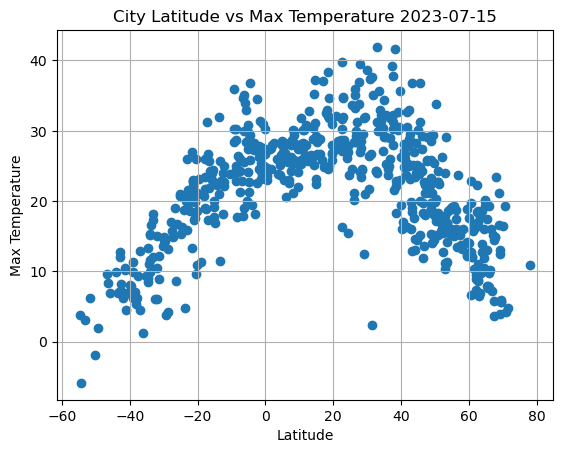

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],marker="o")
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title(f"City Latitude vs Max Temperature 2023-07-15")

# Save the figure
plt.savefig("../output.data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

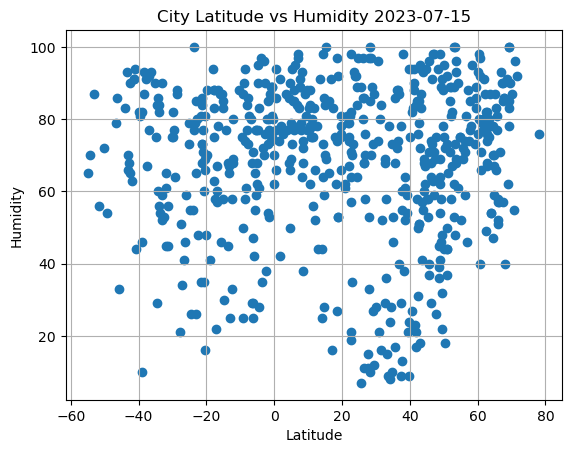

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],marker="o")
plt.grid(True)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City Latitude vs Humidity 2023-07-15")
# Save the figure
plt.savefig("../output.data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

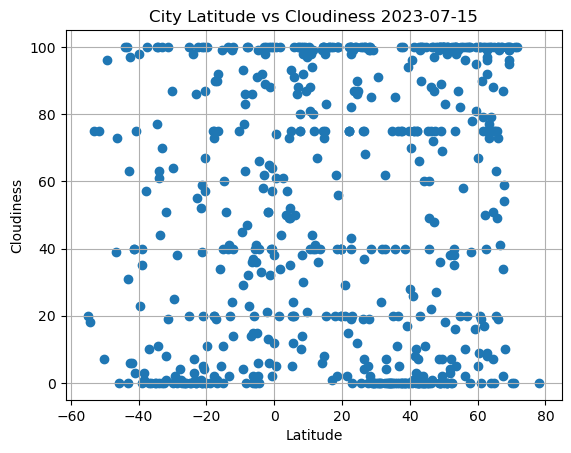

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],marker="o")
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs Cloudiness 2023-07-15")
# Save the figure
plt.savefig("../output.data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

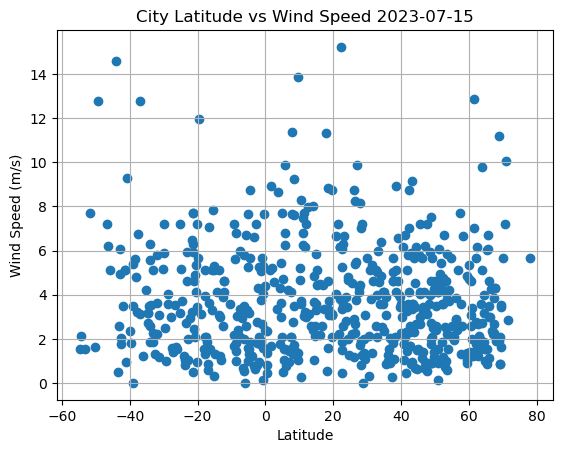

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],marker="o")
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs Wind Speed 2023-07-15")

# Save the figure
plt.savefig("../output.data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
import scipy.stats as st
from scipy.stats import linregress

def Linear_regresion_with_parameters(x_data,y_data):
    
    correlation, p_value = st.pearsonr(x_data, y_data)

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
    regress_values = variable1 * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    x_min= min(x_data)
    x_max= max (x_data)
    y_min=min(y_data)
    y_max = max (y_data)
    x_text = x_max - 0.1 * (x_max - x_min)
    y_text = y_max - 0.1 * (y_max - y_min)

    plt.annotate(line_eq,xy=(x_max,y_max),xytext=(x_text,y_text),fontsize=15,color="red")
    plt.plot(variable1,regress_values,"r-")
    plt.scatter(variable1,variable2,marker="o")
    plt.grid(True)
    # Incorporate the other graph properties
    plt.xlabel(f"{x_data.name}")
    plt.ylabel(f"{y_data.name}")
    #Print correlation
    plt.title(f"The r-value is:{round(correlation,2)}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,4.01,100,100,2.06,GL,1689535893
1,kudahuvadhoo,2.6708,72.8944,28.20,76,61,4.58,MV,1689535894
3,slatyne,50.2242,36.1608,17.22,75,0,3.48,UA,1689535894
4,wajir,1.7471,40.0573,27.58,42,34,8.94,KE,1689535341
6,sitka,57.0531,-135.3300,15.94,88,100,2.57,US,1689535895


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,grytviken,-54.2811,-36.5092,-5.85,70,18,2.11,GS,1689535894
5,punta arenas,-53.1500,-70.9167,3.06,87,75,1.54,CL,1689535895
8,blackmans bay,-43.0167,147.3167,12.07,66,31,6.08,AU,1689535897
10,invercargill,-46.4000,168.3500,8.37,86,73,6.19,NZ,1689535897
13,santo antonio,-6.3106,-35.4789,25.50,71,37,5.82,BR,1689535899


###  Temperature vs. Latitude Linear Regression Plot

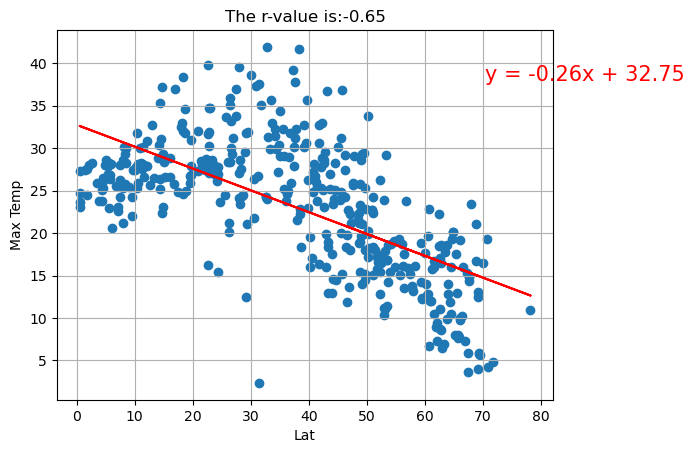

In [31]:
# Linear regression on Northern Hemisphere
# Build the scatter plots for latitude vs. wind speed
variable1=northern_hemi_df["Lat"]
variable2=northern_hemi_df["Max Temp"]
Linear_regresion_with_parameters(variable1,variable2)

# Save the figure
plt.savefig("../output.data/Fig5.png")


# Show plot
plt.show()

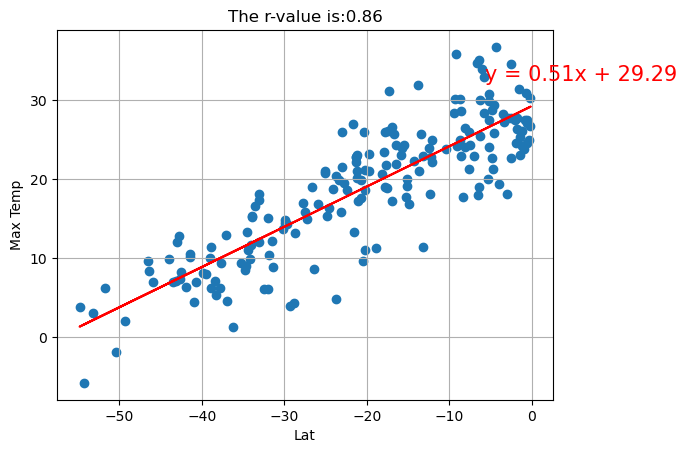

In [32]:
# Linear regression on Southern Hemisphere
variable1=southern_hemi_df["Lat"]
variable2=southern_hemi_df["Max Temp"]
Linear_regresion_with_parameters(variable1,variable2)

# Save the figure
plt.savefig("../output.data/Fig6.png")


# Show plot
plt.show()

**Discussion about the linear relationship:** Upon observation, we find a negative correlation between temperature and latitude in the northern hemisphere. This implies that cities located at higher latitudes experience lower temperatures. Conversely, in the southern hemisphere, a positive correlation exists, suggesting that cities at higher latitudes tend to have higher temperatures. These findings allow us to infer that cities situated closer to the equator latitude generally experience higher temperatures.

### Humidity vs. Latitude Linear Regression Plot

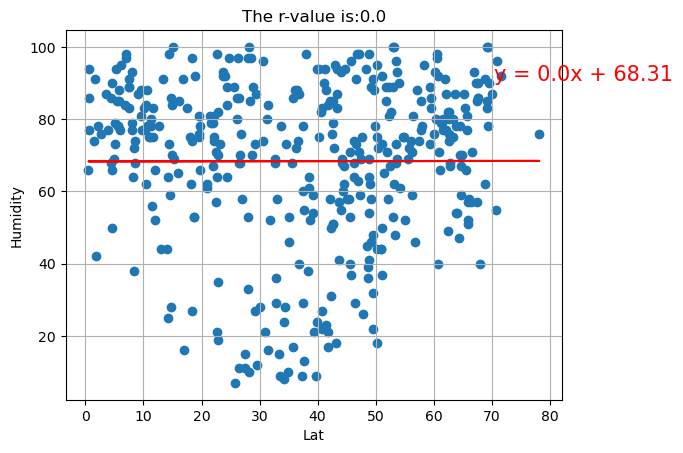

In [33]:
# Northern Hemisphere
variable1=northern_hemi_df["Lat"]
variable2=northern_hemi_df["Humidity"]
Linear_regresion_with_parameters(variable1,variable2)

# Save the figure
plt.savefig("../output.data/Fig7.png")


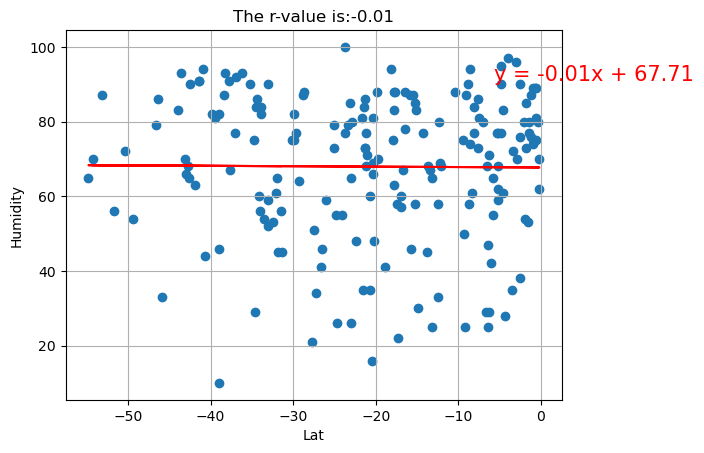

In [34]:
# Southern Hemisphere
variable1=southern_hemi_df["Lat"]
variable2=southern_hemi_df["Humidity"]
Linear_regresion_with_parameters(variable1,variable2)

# Save the figure
plt.savefig("../output.data/Fig8.png")

**Discussion about the linear relationship:** After a thorough analysis of humidity data from cities in both hemispheres, it becomes evident that there is minimal correlation between latitude and humidity. As a result, it is reasonable to deduce that humidity levels are influenced by various other factors, unrelated to the city's latitude.

### Cloudiness vs. Latitude Linear Regression Plot

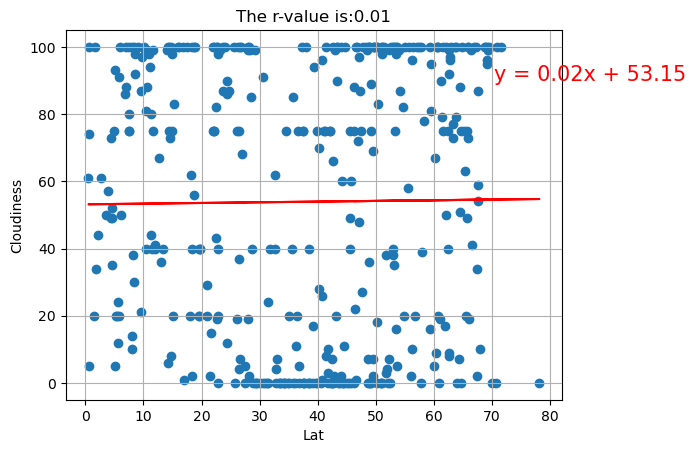

In [35]:
# Northern Hemisphere
variable1=northern_hemi_df["Lat"]
variable2=northern_hemi_df["Cloudiness"]
Linear_regresion_with_parameters(variable1,variable2)

# Save the figure
plt.savefig("../output.data/Fig9.png")

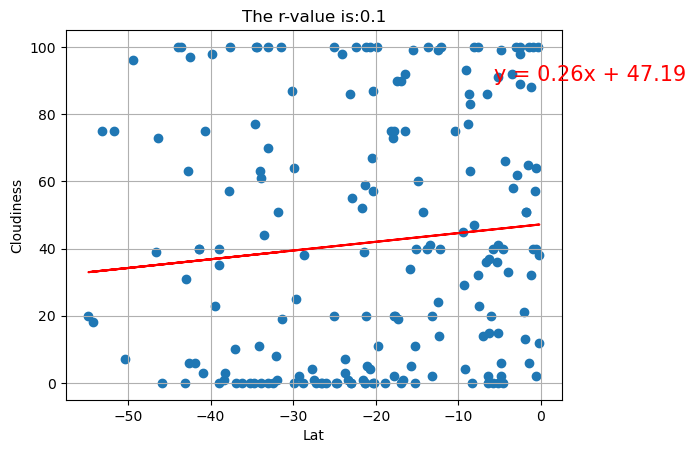

In [36]:
# Southern Hemisphere
variable1=southern_hemi_df["Lat"]
variable2=southern_hemi_df["Cloudiness"]
Linear_regresion_with_parameters(variable1,variable2)

# Save the figure
plt.savefig("../output.data/Fig10.png")

**Discussion about the linear relationship:** Upon analysis, it becomes apparent that cloudiness shows an extremely weak correlation with latitude. This similarity to humidity suggests that cloudiness is likely influenced by a multitude of factors unrelated to a city's geographic location. In the southern hemisphere, where a minimal correlation might be observed, we can confidently dismiss this finding, attributing it to the timing of data collection and potential seasonal effects, such as storm patterns.

### Wind Speed vs. Latitude Linear Regression Plot

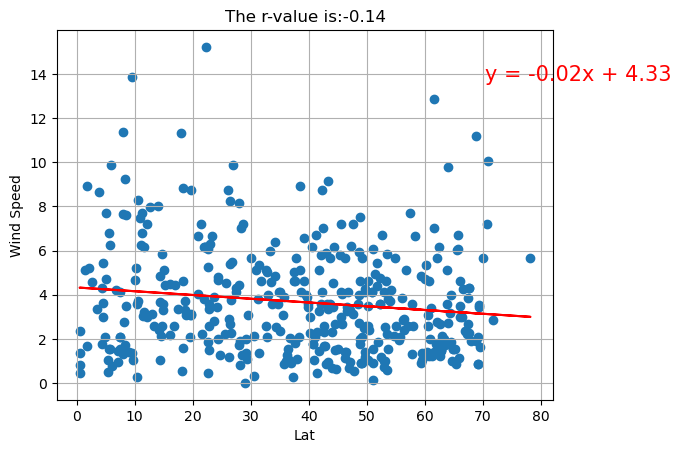

In [37]:
# Northern Hemisphere
variable1=northern_hemi_df["Lat"]
variable2=northern_hemi_df["Wind Speed"]
Linear_regresion_with_parameters(variable1,variable2)

# Save the figure
plt.savefig("../output.data/Fig11.png")

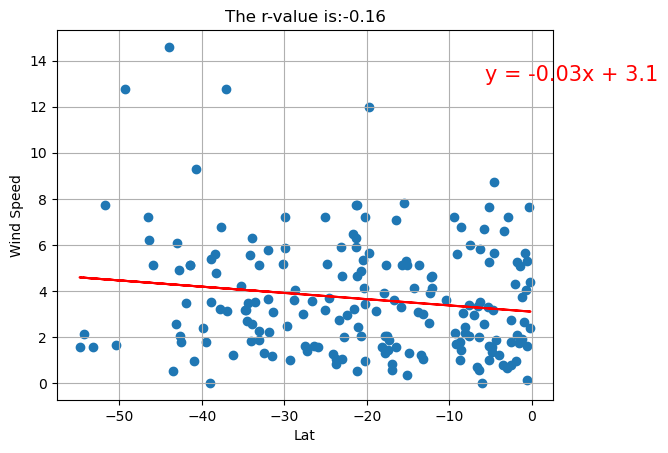

In [38]:
# Southern Hemisphere
variable1=southern_hemi_df["Lat"]
variable2=southern_hemi_df["Wind Speed"]
Linear_regresion_with_parameters(variable1,variable2)

# Save the figure
plt.savefig("../output.data/Fig12.png")

**Discussion about the linear relationship:** In conclusion, after careful observation, we find a weak negative correlation between wind speed and latitude in both hemispheres. This implies that locations closer to the South Pole generally experience higher wind speeds. However, when we examine the scatter plots for the southern and northern hemispheres, we notice a discrepancy. The expected wind speed at the equator's latitude is unexpectedly lower in the south hemisphere than in the northern hemisphere, leading us to conclude that there is no valid correlation between wind speed and latitude based on the obtained results.